In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [91]:
cd Grids

/home/pau/Desktop/Fisidabo_Final/Codi/Fase3/Ebola4/Grids


In [92]:
ls

0f3expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
1f3expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
1f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
2f3expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
2f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
3f3expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
3f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
4f3expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
4f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy
exp3ck.npy
exp3real.npy
f2expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2.npy
f2expc.npy
f3real_mu_0_0.2_nu_0_2_spin_-5_5.npy
grid2ck.npy
Grid_Analysis.ipynb
hanpetat.txt
taula1real_mu_0_0.2_nu_0_2_spin_-5_5.npy
taula2real_mu_0_0.2_nu_0_2_spin_-5_5.npy
taula3real_mu_0_0.2_nu_0_2_spin_-5_5.npy
taula4real_mu_0_0.2_nu_0_2_spin_-5_5.npy


In [93]:
def index_to_value(M, bounds, s, noms, n=True):
    assert len(s) == len(bounds)
    assert len(s) == len(M.shape)
    for i,j in enumerate(bounds):
        if n:
            print(noms[i], np.linspace(j[0],j[1],M.shape[i])[s[i]], end = ' ')
        else:
            print(np.linspace(j[0],j[1],M.shape[i])[s[i]], end = " ")
    print("")

In [94]:
def process(M):
    for i in np.array(np.where(np.isnan(M))).T:
        index_to_value(M,bounds,i, noms)
    M[np.isnan(M)] = 99
    return np.minimum(M,99)

In [95]:
M = np.load("f2expc.npy")

In [98]:
M.shape

(10, 10, 10)

In [106]:
M[np.isnan(M)] = -1

In [108]:
M[8,5,2]

-1.0

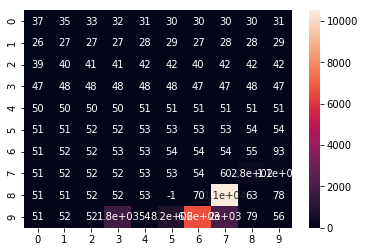

In [107]:
sns.heatmap(M[:,:,2], annot = True)

In [86]:
M = process(M)
bounds = ((1,1.5),(0,0.5),(0,0.5),(-2,2))

In [87]:
noms = ["sigma", "mu", "nu", "s0"]

In [66]:
np.min(M)

16.276524105024027

In [67]:
np.argmin(M)

125

In [68]:
M.shape

(5, 5, 5, 5)

In [88]:
for i in np.array(np.where(M < 20)).T:
    print(i)
    index_to_value(M, bounds, i, noms)

[0 0 0 0]
sigma 1.0 mu 0.0 nu 0.0 s0 -2.0 
[1 0 0 0]
sigma 1.125 mu 0.0 nu 0.0 s0 -2.0 


In [78]:
sigma_b = (1,1.5)
mu_b = (0, 0.5)
nu_b = (0, 0.5)
spin_b = (-2, 2)

v0 = np.linspace(*sigma_b, 5)
v1 = np.linspace(*mu_b, 5)
v2 = np.linspace(*nu_b, 5)
v3 = np.linspace(*spin_b, 5)

In [80]:
np.unravel_index(np.argmin(M), dims = M.shape)

(1, 0, 0, 0)

In [72]:
cd ..

/home/pau/Desktop/Fisidabo_Final/Codi/Fase3/Ebola4


In [73]:
%run fit.py

In [82]:
v0[1],v1[0],v2[0],v3[0]

(1.125, 0.0, 0.0, -2.0)

In [81]:
f3expck([v0[1],v1[0],v2[0],v3[0]], None)

16.276524105024027

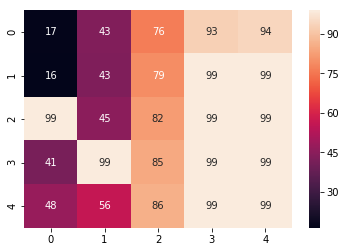

In [46]:
sns.heatmap(M[:,0,0,:], annot = True)

In [35]:
M.shape

(5, 5, 5, 5)

In [33]:
for i in np.array(np.where(M < 40)).T:
    index_to_value(M, bounds, i, noms)

1.02631578947 0.157894736842 
1.05263157895 0.157894736842 
1.05263157895 0.263157894737 
1.05263157895 0.473684210526 
1.07894736842 0.210526315789 
1.07894736842 0.421052631579 
1.13157894737 0.210526315789 
1.13157894737 0.315789473684 
1.18421052632 0.210526315789 
1.21052631579 0.210526315789 
1.23684210526 0.263157894737 
1.31578947368 0.263157894737 
1.34210526316 0.473684210526 
1.36842105263 0.421052631579 
1.39473684211 0.368421052632 
1.39473684211 0.421052631579 
1.44736842105 0.210526315789 
1.44736842105 0.368421052632 
1.44736842105 0.473684210526 
1.47368421053 0.210526315789 
1.47368421053 0.263157894737 


Ebola2, exponencial

In [5]:
M = np.load("f2expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2.npy")

In [6]:
M.shape

(10, 10, 10)

In [7]:
bounds = ((0.1,0.8),(1,1.5),(0,0.2))

In [8]:
noms = ["k", "sigma", "mu"]

In [9]:
M = process(M)

k 0.255555555556 sigma 1.33333333333 mu 0.133333333333 
k 0.255555555556 sigma 1.33333333333 mu 0.155555555556 
k 0.255555555556 sigma 1.33333333333 mu 0.2 
k 0.255555555556 sigma 1.38888888889 mu 0.155555555556 
k 0.255555555556 sigma 1.44444444444 mu 0.133333333333 
k 0.255555555556 sigma 1.44444444444 mu 0.177777777778 
k 0.255555555556 sigma 1.5 mu 0.155555555556 
k 0.255555555556 sigma 1.5 mu 0.2 
k 0.333333333333 sigma 1.0 mu 0.133333333333 
k 0.333333333333 sigma 1.0 mu 0.177777777778 
k 0.333333333333 sigma 1.0 mu 0.2 
k 0.333333333333 sigma 1.05555555556 mu 0.155555555556 
k 0.333333333333 sigma 1.11111111111 mu 0.133333333333 
k 0.333333333333 sigma 1.11111111111 mu 0.155555555556 
k 0.333333333333 sigma 1.11111111111 mu 0.2 
k 0.333333333333 sigma 1.16666666667 mu 0.111111111111 
k 0.333333333333 sigma 1.16666666667 mu 0.133333333333 
k 0.333333333333 sigma 1.16666666667 mu 0.177777777778 
k 0.333333333333 sigma 1.16666666667 mu 0.2 
k 0.333333333333 sigma 1.22222222222 mu 0

In [13]:
np.min(M)

18.701146109834951

In [21]:
np.linspace(1.0,1.5,10)[:7]

array([ 1.        ,  1.05555556,  1.11111111,  1.16666667,  1.22222222,
        1.27777778,  1.33333333])

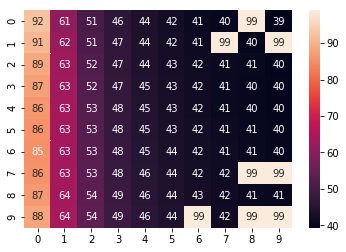

In [48]:
sns.heatmap(M[5,:,:], annot = True)

In [25]:
index_to_value(M, bounds, [5,4,4], noms)

k 0.488888888889 sigma 1.22222222222 mu 0.0888888888889 


In [22]:
[]
for i in np.array(np.where(M < 35)).T:
    index_to_value(M, bounds, i, noms)

k 0.1 sigma 1.05555555556 mu 0.0444444444444 
k 0.1 sigma 1.11111111111 mu 0.0444444444444 
k 0.1 sigma 1.11111111111 mu 0.0666666666667 
k 0.1 sigma 1.16666666667 mu 0.0444444444444 
k 0.1 sigma 1.16666666667 mu 0.0666666666667 
k 0.1 sigma 1.22222222222 mu 0.0444444444444 
k 0.1 sigma 1.22222222222 mu 0.0666666666667 
k 0.1 sigma 1.27777777778 mu 0.0444444444444 
k 0.1 sigma 1.27777777778 mu 0.0666666666667 
k 0.1 sigma 1.27777777778 mu 0.0888888888889 
k 0.1 sigma 1.33333333333 mu 0.0444444444444 
k 0.1 sigma 1.33333333333 mu 0.0666666666667 
k 0.1 sigma 1.33333333333 mu 0.0888888888889 
k 0.1 sigma 1.38888888889 mu 0.0444444444444 
k 0.1 sigma 1.38888888889 mu 0.0666666666667 
k 0.1 sigma 1.38888888889 mu 0.0888888888889 
k 0.1 sigma 1.44444444444 mu 0.0444444444444 
k 0.1 sigma 1.44444444444 mu 0.0666666666667 
k 0.1 sigma 1.44444444444 mu 0.0888888888889 
k 0.1 sigma 1.5 mu 0.0444444444444 
k 0.1 sigma 1.5 mu 0.0666666666667 
k 0.1 sigma 1.5 mu 0.0888888888889 
k 0.177777777778 s

Ebola3, exponencial

In [49]:
M = np.load("0f3expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy")

In [55]:
M = process(M)

k 0.275 sigma 1.0 mu 0.05 nu 0.0 s0 -5.0 
k 0.275 sigma 1.25 mu 0.15 nu 0.0 s0 5.0 
k 0.275 sigma 1.25 mu 0.15 nu 1.0 s0 -2.5 
k 0.275 sigma 1.375 mu 0.0 nu 1.0 s0 2.5 
k 0.275 sigma 1.5 mu 0.15 nu 1.0 s0 -2.5 
k 0.275 sigma 1.5 mu 0.15 nu 2.0 s0 5.0 
k 0.275 sigma 1.5 mu 0.2 nu 0.5 s0 -5.0 
k 0.275 sigma 1.5 mu 0.2 nu 0.5 s0 -2.5 
k 0.45 sigma 1.0 mu 0.15 nu 0.5 s0 -5.0 
k 0.45 sigma 1.0 mu 0.15 nu 0.5 s0 -2.5 
k 0.45 sigma 1.0 mu 0.2 nu 0.0 s0 -2.5 
k 0.45 sigma 1.0 mu 0.2 nu 1.0 s0 0.0 
k 0.45 sigma 1.125 mu 0.15 nu 0.5 s0 2.5 
k 0.45 sigma 1.125 mu 0.15 nu 2.0 s0 0.0 
k 0.45 sigma 1.125 mu 0.2 nu 2.0 s0 -2.5 
k 0.45 sigma 1.25 mu 0.1 nu 1.5 s0 2.5 
k 0.45 sigma 1.25 mu 0.15 nu 0.0 s0 5.0 
k 0.45 sigma 1.25 mu 0.15 nu 2.0 s0 2.5 
k 0.45 sigma 1.25 mu 0.2 nu 0.0 s0 0.0 
k 0.45 sigma 1.375 mu 0.1 nu 0.0 s0 -2.5 
k 0.45 sigma 1.375 mu 0.1 nu 0.5 s0 -5.0 
k 0.45 sigma 1.375 mu 0.1 nu 1.5 s0 -5.0 
k 0.45 sigma 1.375 mu 0.15 nu 0.0 s0 5.0 
k 0.45 sigma 1.375 mu 0.15 nu 1.0 s0 0.0 
k 0.45 

In [50]:
for i in range(5):
    M = np.maximum(np.load(str(i)+"f3expc_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy"), M)

In [56]:
len(M.shape)

5

In [57]:
bounds = ((0.1,0.8),(1,1.5),(0,0.2),(0,2),(-5,5))
noms = ["k","sigma","mu","nu","s0"]

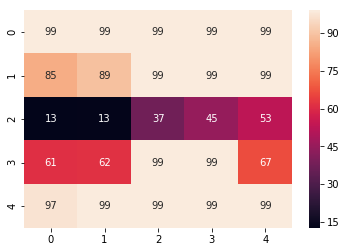

In [58]:
sns.heatmap(M[:,:,0,0,1], annot = True)

In [61]:
M.shape

(5, 5, 5, 5, 5)

In [62]:
np.min(M)

10.810691803755338

In [59]:
for i in np.array(np.where(M < 25)).T:
    index_to_value(M, bounds, i, noms)

k 0.275 sigma 1.0 mu 0.05 nu 0.0 s0 -2.5 
k 0.275 sigma 1.125 mu 0.0 nu 0.5 s0 -2.5 
k 0.45 sigma 1.0 mu 0.0 nu 0.0 s0 -2.5 
k 0.45 sigma 1.125 mu 0.0 nu 0.0 s0 -2.5 
k 0.625 sigma 1.0 mu 0.0 nu 0.0 s0 -5.0 
k 0.8 sigma 1.0 mu 0.0 nu 0.0 s0 -5.0 


In [60]:
np.unravel_index(np.argmin(M),M.shape)

(4, 0, 0, 0, 0)

f3 llit real

In [11]:
M = np.load("f3real_mu_0_0.2_nu_0_2_spin_-5_5.npy")

In [12]:
M.shape

(10, 10, 10)

In [13]:
np.min(M)

12.047922493127244

In [14]:
bounds = ((0,0.2),(0,2),(-5,5))
noms = ["mu","nu","s0"]

In [15]:
M = process(M)

In [16]:
for i in np.array(np.where(M < 15)).T:
    index_to_value(M, bounds, i, noms)

mu 0.0 nu 0.0 s0 -2.77777777778 


In [17]:
for i in np.array(np.where(M < 25)).T:
    index_to_value(M, bounds, i, noms)

mu 0.0 nu 0.0 s0 -3.88888888889 
mu 0.0 nu 0.0 s0 -2.77777777778 


Taula de 4

In [63]:
bounds = ((1,2.5),(0.1,0.8),(1,1.5),(0,0.2),(0,2),(-5,5))
noms = ["c","k","sigma","mu","nu","s0"]

In [64]:
M1 = np.load("1f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy")
M2 = np.load("2f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy")
M3 = np.load("3f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy")
M4 = np.load("4f3real_c_1_2.5_k_0.1_0.8_sigma_1_1.5_mu_0_0.2_nu_0_2_spin_-5_5.npy")


In [65]:
M1.shape

(4, 4, 4, 4, 4, 4)

In [66]:
M1 = process(M1)
M2 = process(M2)
M3 = process(M3)
M4 = process(M4)


c 1.0 k 0.566666666667 sigma 1.5 mu 0.2 nu 0.0 s0 -1.66666666667 
c 1.0 k 0.8 sigma 1.5 mu 0.133333333333 nu 2.0 s0 -1.66666666667 
c 1.0 k 0.8 sigma 1.5 mu 0.2 nu 2.0 s0 5.0 
c 1.5 k 0.333333333333 sigma 1.5 mu 0.133333333333 nu 2.0 s0 -5.0 
c 1.5 k 0.333333333333 sigma 1.5 mu 0.2 nu 0.666666666667 s0 5.0 
c 1.5 k 0.8 sigma 1.33333333333 mu 0.133333333333 nu 0.666666666667 s0 -5.0 
c 1.5 k 0.8 sigma 1.33333333333 mu 0.2 nu 0.0 s0 -1.66666666667 
c 1.5 k 0.8 sigma 1.5 mu 0.0 nu 0.0 s0 -5.0 
c 1.5 k 0.8 sigma 1.5 mu 0.2 nu 1.33333333333 s0 5.0 
c 2.0 k 0.333333333333 sigma 1.33333333333 mu 0.2 nu 1.33333333333 s0 -1.66666666667 
c 2.0 k 0.333333333333 sigma 1.5 mu 0.2 nu 0.0 s0 -1.66666666667 
c 2.0 k 0.566666666667 sigma 1.16666666667 mu 0.2 nu 0.0 s0 1.66666666667 
c 2.0 k 0.566666666667 sigma 1.33333333333 mu 0.0666666666667 nu 0.0 s0 5.0 
c 2.0 k 0.566666666667 sigma 1.33333333333 mu 0.133333333333 nu 0.666666666667 s0 -5.0 
c 2.0 k 0.8 sigma 1.33333333333 mu 0.0666666666667 nu 0.0 

In [68]:
np.min(M1), np.min(M2), np.min(M3), np.min(M4)

(4.7789151765204911,
 4.9775974575480948,
 15.120041827084453,
 0.4558125463466679)

In [67]:
for i in np.array(np.where(M1 < 8)).T:
    index_to_value(M1, bounds, i, noms)

c 1.5 k 0.333333333333 sigma 1.0 mu 0.0 nu 0.666666666667 s0 -5.0 
c 1.5 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 1.33333333333 s0 -5.0 
c 1.5 k 0.8 sigma 1.0 mu 0.0 nu 0.0 s0 -5.0 


In [69]:
for i in np.array(np.where(M2 < 8)).T:
    index_to_value(M2, bounds, i, noms)

c 1.5 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 0.666666666667 s0 -5.0 
c 1.5 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 1.33333333333 s0 -5.0 
c 1.5 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 2.0 s0 -5.0 


In [196]:
for i in np.array(np.where(M3 < 18)).T:
    index_to_value(M3, bounds, i, noms)

c 1.0 k 0.566666666667 sigma 1.16666666667 mu 0.0 nu 0.0 s0 -1.66666666667 
c 2.0 k 0.333333333333 sigma 1.0 mu 0.0 nu 1.33333333333 s0 -5.0 
c 2.0 k 0.333333333333 sigma 1.0 mu 0.0 nu 2.0 s0 -5.0 
c 2.0 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 0.666666666667 s0 -1.66666666667 
c 2.0 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 1.33333333333 s0 -5.0 
c 2.0 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 1.33333333333 s0 -1.66666666667 
c 2.0 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 2.0 s0 -5.0 
c 2.0 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 2.0 s0 -1.66666666667 
c 2.0 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 2.0 s0 1.66666666667 
c 2.0 k 0.333333333333 sigma 1.33333333333 mu 0.0 nu 1.33333333333 s0 -5.0 
c 2.0 k 0.8 sigma 1.16666666667 mu 0.0 nu 0.0 s0 -5.0 


In [70]:
for i in np.array(np.where(M4 < 1)).T:
    index_to_value(M4, bounds, i, noms)

c 1.0 k 0.333333333333 sigma 1.0 mu 0.0 nu 0.0 s0 1.66666666667 
c 1.5 k 0.333333333333 sigma 1.16666666667 mu 0.0 nu 0.0 s0 -1.66666666667 
c 2.0 k 0.333333333333 sigma 1.0 mu 0.0 nu 0.0 s0 -1.66666666667 
c 2.0 k 0.333333333333 sigma 1.33333333333 mu 0.0 nu 0.666666666667 s0 -5.0 
